the cell below imports all repositories and sets a defined figure size

In [1]:
import numpy as np
import sep
import astropy.io.fits
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
%matplotlib inline
#sets a distinct figure size
rcParams['figure.figsize'] = [10.,8.]

the cell below imports the fits file and opens the data

In [3]:

hdul = fits.open("image.fits")
data = hdul[0].data


the below cell creates a mean and standard deviation for the data. it then plots the data in an image with mins and max set by the sums and differences of the mean and std deviations respectively

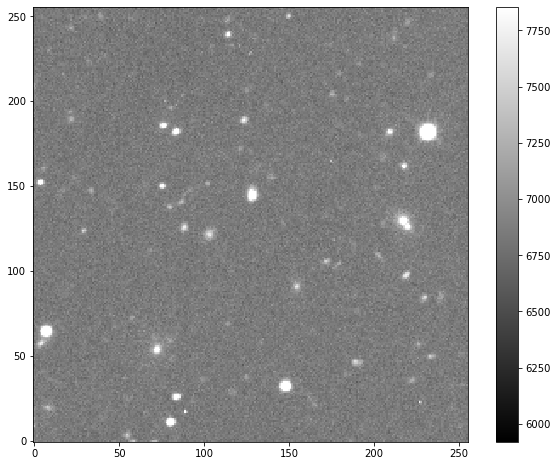

In [4]:

m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray',vmin=m-s, vmax = m+s, origin='lower')
plt.colorbar();
plt.savefig('tutorial outputs/image1_mean and std.png', dpi=600, orientation = 'landscape')

measures a background on the image data and prints the  global mean and global root mean squared values

In [5]:
bkg = sep.Background(data)
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


the below function creates the background as a 2d array and the shows the background.

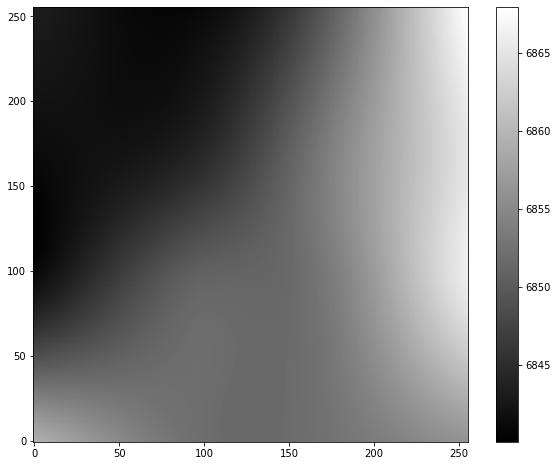

In [6]:
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('tutorial outputs/image2_background.png', dpi=600, orientation = 'landscape')

the below function evaluates the background root mean squared and shows it

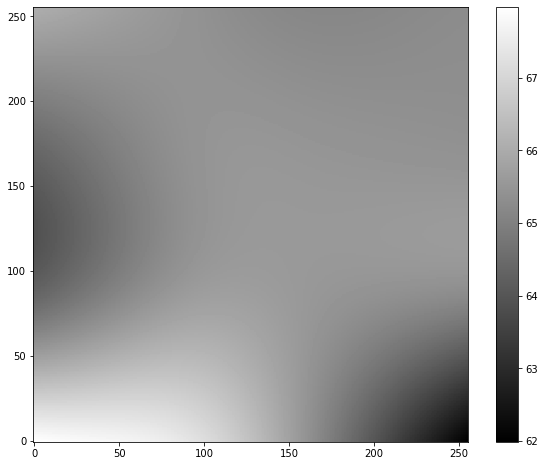

In [7]:
bkg_rms = bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('tutorial outputs/image3_background_rms.png', dpi=600, orientation = 'landscape')

the below function subtracts the background data from the data

In [8]:
data_sub = data - bkg

the below function extracts all of the objects from the background subtracted data

In [9]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
len(objects)

68

this function below will plot ellipses around all detected objects coordinates on the image

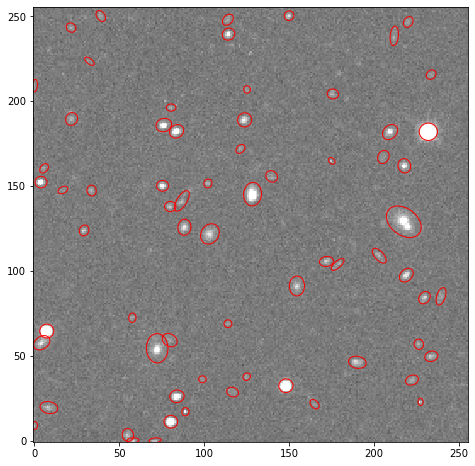

In [10]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]), width = 6*objects['a'][i], height=6*objects['b'][i], angle=objects['theta'][i]* 180. /np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
plt.savefig('tutorial outputs/image4_object_ellipse.png', dpi=600, orientation = 'landscape')

prints all types of objects names and values

In [11]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

the below functions performas circular aperature photometry and print the flux values

In [12]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

In [13]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
